Notebook to test the reimplementation of the Compton subtraction method, including helper functions. Written 20190708


In [1]:
%load_ext autoreload
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import ompy

<IPython.core.display.Javascript object>


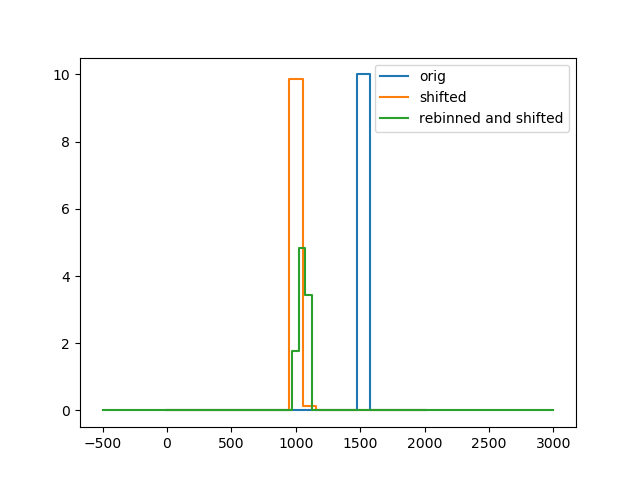

In [2]:
# Test the rebin_and_shift function

N = 20
E_array = np.linspace(0, 2000, N)
counts = np.zeros(N)
counts[15] = 10

# Test shift() function:
counts_shifted = ompy.shift(counts, E_array_in=E_array, energy_shift=-525)

# Test rebin_and_shift() function:
E_array_rebin = np.linspace(-500, 3000, N+50)
counts_rebinned_and_shifted = ompy.rebin_and_shift(counts, E_array_in=E_array, E_array_out=E_array_rebin, energy_shift=-525)

f, ax = plt.subplots(1)

ax.step(E_array, counts, label="orig")
ax.step(E_array, counts_shifted, label="shifted")
ax.step(E_array_rebin, counts_rebinned_and_shifted, label="rebinned and shifted")

ax.legend()

plt.show()

# Test the compton subtraction method

In [6]:
raw = ompy.load_example_raw("Si28")

# Testing with standard values for folder_path_response and fwhm, given in constants.py:
unfolder = ompy.Unfolder()
unfolded = unfolder.unfold(raw)

AttributeError: 'Unfolder' object has no attribute 'R_calibration_array'

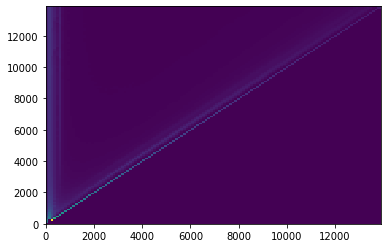

In [4]:
unfolder.response_matrix.plot(zscale="linear")

../../ompy/unfold.py:369: RuntimeWarning: invalid value encountered in true_divide
  fluctuations_matrix = fluctuations_matrix/fluctuations_vector_raw[:,None] # TODO check that this broadcasts the vector over the right dimension


DEBUG: Running Compton subtraction method.


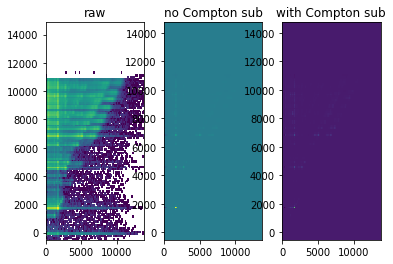

In [5]:
# Run unfolding without Compton subtraction:
unfolded_no_compton = unfolder.unfold(raw, use_comptonsubtraction=False)

# Run unfolding again WITH Compton subtraction:
unfolded_with_compton = unfolder.unfold(raw, FWHM_factor=10, use_comptonsubtraction=True)


# Plot:
f, (ax0, ax1, ax2) = plt.subplots(1, 3)

# Plot raw:
raw.plot(ax=ax0, title="raw")

# Plot unfolded without Compton subtraction method:
unfolded_no_compton.plot(ax=ax1, zscale="linear", title="no Compton sub")

# Plot unfolded with Compton subtraction method:
unfolded_with_compton.plot(ax=ax2, zscale="linear", title="with Compton sub")

#f.set_size_inches(15, 5)

<IPython.core.display.Javascript object>


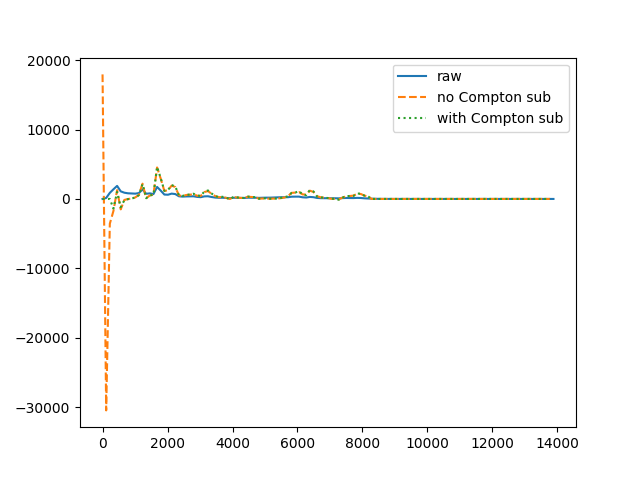

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [6]:
# Plot projections:
E_limits = [8000, 8200]

# Plot:
f, ax0 = plt.subplots(1)

# Plot raw:
raw.plot_projection_x(E_limits, ax=ax0, label="raw", linestyle="-")

# Plot unfolded without Compton subtraction method:
unfolded_no_compton.plot_projection_x(E_limits, ax=ax0, label="no Compton sub", linestyle="--")

# Plot unfolded with Compton subtraction method:
unfolded_with_compton.plot_projection_x(E_limits, ax=ax0, label="with Compton sub", linestyle=":")

ax0.legend()
ax1.legend()
ax2.legend()

#f.set_size_inches(15, 5)